Business Intelligence Questions 

1. Sales by Product line [Bar or Barh Chart]
2. Relationship between Quantity and Total (Sales) [Scatter Plot]
3. Monthly Quantity Sold [Bar Chart]
4. Weekly Quantity sold (use the week_end_date column) [Bar Chart]
5. Quantity sold by warehouse [Bar Chart or Barh Chart]

In [4]:
df = pd.read_csv('sales_data.csv')
df

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash


In [56]:
 # 1. Sales by product line
prod_line = df.groupby('product_line')['total'].sum().sort_values(ascending=False)
prod_line

product_line
Suspension & traction    73014.21
Frame & body             69024.73
Electrical system        43612.71
Breaking system          38350.15
Engine                   37945.38
Miscellaneous            27165.82
Name: total, dtype: float64

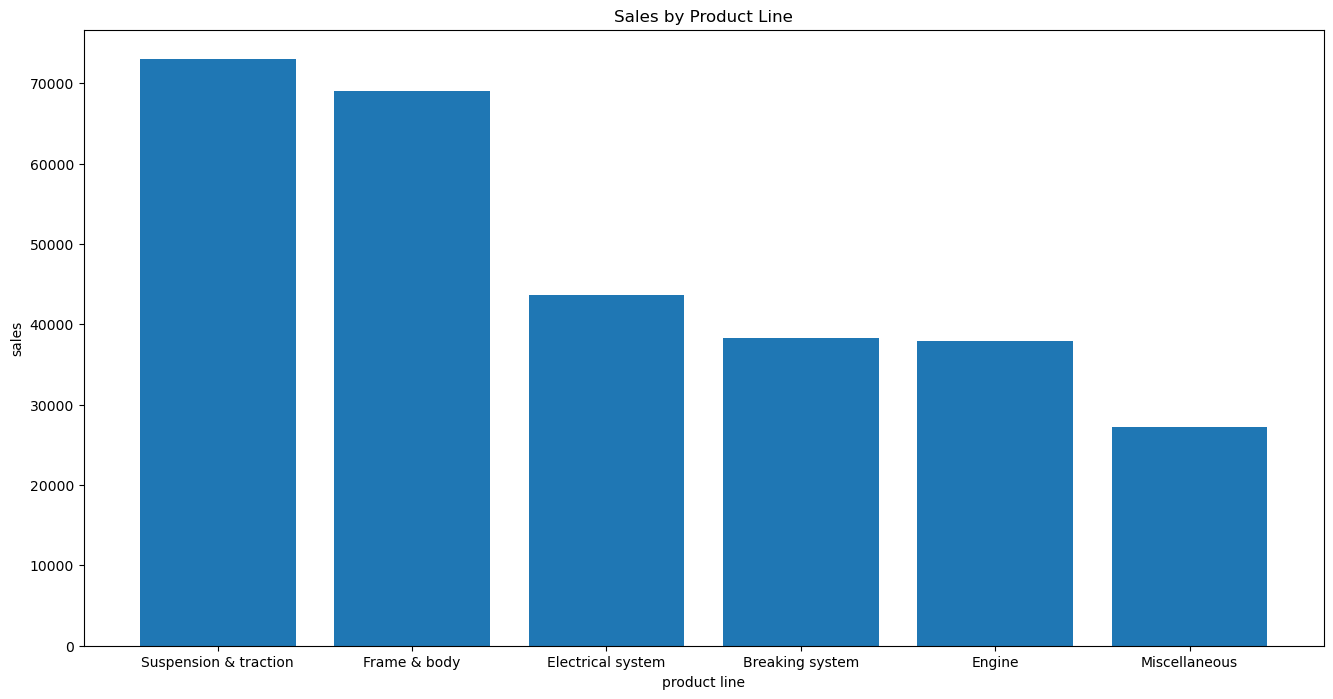

In [59]:
fig = plt.figure(figsize = (16,8))
plt.bar(prod_line.index,prod_line.values)
plt.title('Sales by Product Line')
plt.xlabel('product line')
plt.ylabel('sales')
plt.show()

<Axes: xlabel='quantity', ylabel='total'>

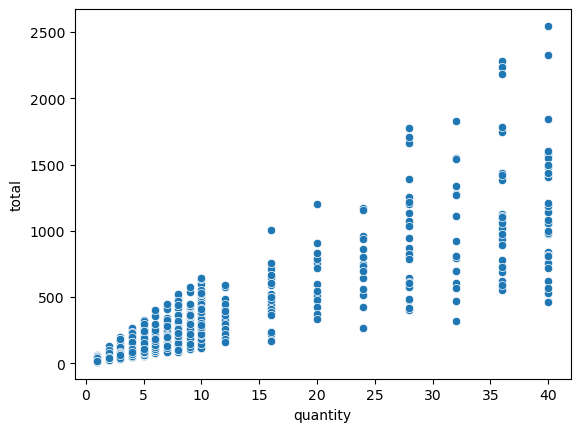

In [65]:
# 2.Relationship between Quantity and Total Sales
import seaborn as sb
relationship = sb.scatterplot(data = df, x='quantity', y='total')
relationship

In [71]:
# 3. Monthly quantity sold
df.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

In [11]:
# changing the date column data type from object to datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes
# creating a the column month date
df['Month date'] = df['date'].dt.to_period('M')
Monthly_qty_sold = df.groupby('Month date')['quantity'].sum().sort_values(ascending = False)
Monthly_qty_sold.values.dtype

dtype('int64')

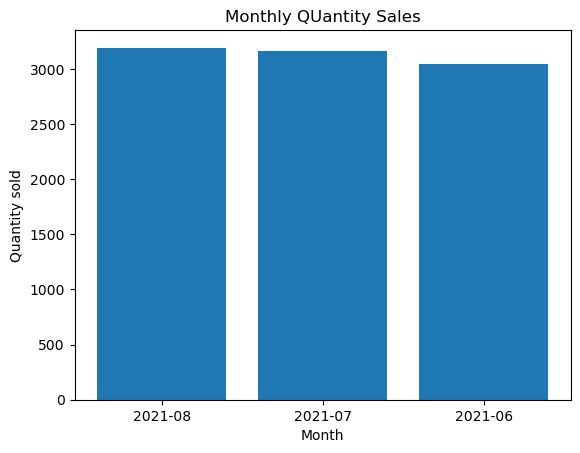

In [31]:
# plotting the chart
plt.bar(Monthly_qty_sold.index.astype('str'), Monthly_qty_sold.values)
plt.title('Monthly Quantity Sales')
plt.xlabel('Month')
plt.ylabel('Quantity sold')
plt.show()

In [28]:
# 4.Quantity sold by weekday
df['date'].dt.to_period('W').head(5)


0    2021-05-31/2021-06-06
1    2021-05-31/2021-06-06
2    2021-05-31/2021-06-06
3    2021-05-31/2021-06-06
4    2021-05-31/2021-06-06
Name: date, dtype: period[W-SUN]

In [21]:
df['week_date']= df['date'].dt.to_period('W')
df['week_date']

0      2021-05-31/2021-06-06
1      2021-05-31/2021-06-06
2      2021-05-31/2021-06-06
3      2021-05-31/2021-06-06
4      2021-05-31/2021-06-06
               ...          
995    2021-08-23/2021-08-29
996    2021-08-23/2021-08-29
997    2021-08-23/2021-08-29
998    2021-08-23/2021-08-29
999    2021-08-23/2021-08-29
Name: week_date, Length: 1000, dtype: period[W-SUN]

In [33]:
df.head(2)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,Month date,week_end_date,week_date,week_end_date_sales_by_qty
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,2021-06,2021-06-06,2021-05-31/2021-06-06,NaN
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,2021-06,2021-06-06,2021-05-31/2021-06-06,NaN


In [43]:
# creating a column week end date
df['week_end_date'] =  df['date'].dt.to_period('W').dt.strftime('%Y-%m-%d')
week_end_date_sales_by_qty = df.groupby('week_end_date')['quantity'].sum()
week_end_date_sales_by_qty.values

array([ 464,  746,  788,  687,  898,  851,  660,  509,  780, 1021,  774,
        624,  593], dtype=int64)

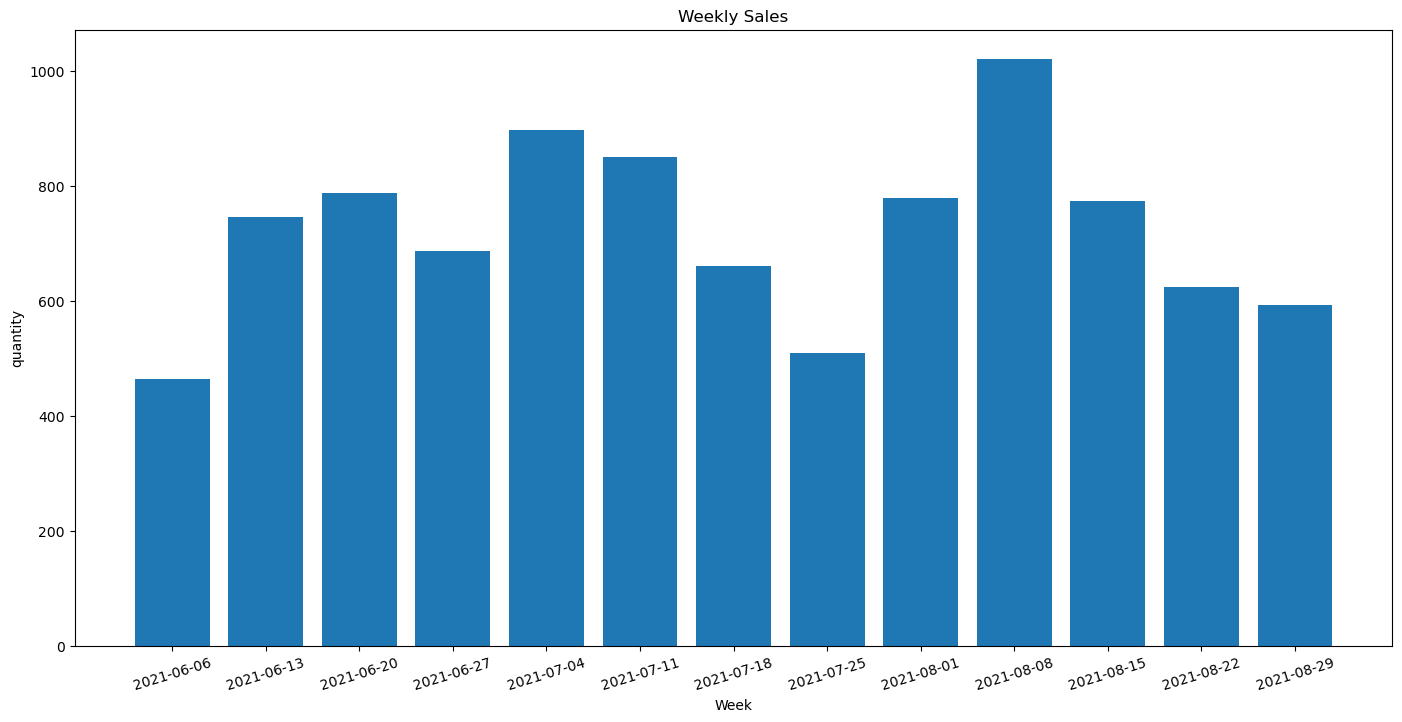

In [47]:
# plotting the bar chart
fig = plt.figure(figsize= (17,8))
plt.bar(week_end_date_sales_by_qty.index.astype('str'),week_end_date_sales_by_qty.values)
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('quantity')
plt.xticks(rotation=17)
plt.show()

In [48]:
# Question 5
df['warehouse'].value_counts()

Central    480
North      340
West       180
Name: warehouse, dtype: int64

In [6]:
df.groupby('warehouse')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
qty_sold_warehouse = df.groupby('warehouse')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
qty_sold_warehouse

,warehouse,quantity
0,Central,4527
1,North,3254
2,West,1614


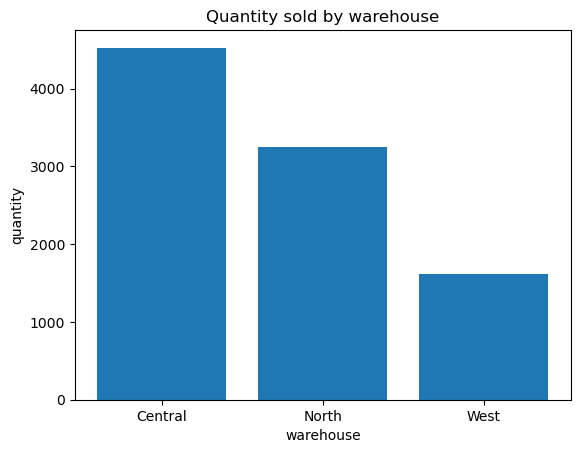

In [7]:
# Plotting the bar chart

plt.bar(x=qty_sold_warehouse['warehouse'], height=qty_sold_warehouse['quantity'])
plt.title('Quantity sold by warehouse')
plt.xlabel('warehouse')
plt.ylabel('quantity')
plt.show()